#Trabajo Final Grupo Nº 2

Rafael Perez	rafaelperezctes@gmail.com
Olinca Ayala	olincayalan88@gmail.com
###@Created on Dec Sat 2 16:57:20 2023
###@author: Grupo Nº 2


# Modulo Gui

Este cuaderno realiza la descarga y análisis de secuencias nucleotídicas de integronas de Shewanella utilizando Biopython.




Este código descarga el dataset de secuencias de integrasas de Shewanella desde el NCBI. Luego, realiza un alineamiento múltiple de las secuencias para identificar las regiones conservadas. A continuación, selecciona un objetivo blanco para las guías CRISPR/Cas9. Finalmente, diseña las guías CRISPR/Cas9 y realiza la transformación de las bacterias de Shewanella que albergan integrones.

Para verificar la edición mediante secuenciación, se pueden diseñar primers específicos para la región editada. El código anterior muestra cómo diseñar primers para la región editada del gen de la integrasa.



**1. Breve introducción**

Los integrones son plataformas genéticas que se encuentran comúnmente en bacterias. Su función principal es la captura y la expresión de genes, los cuales están especialmente asociados con la resistencia a antibióticos. La tecnología CRISPR ha demostrado ser una herramienta poderosa para la edición genética precisa.

**2. Hipótesis de Trabajo y Resultados Esperados**

La hipótesis del proyecto es que el uso de CRISPR/Cas9 específicamente dirigido al gen de la integrasa en integrones de bacterias del género Shewanella puede resultar en la interrupción o desactivación de la función de recombinación de ADN de la integrasa. Se hipotetiza que al modificar el gen de la integrasa, se reducirá la capacidad de los integrones para capturar y expresar genes asociados con la resistencia a antibióticos en las bacterias de este género.

Los resultados esperados del proyecto son:

* Demostrar la capacidad de la tecnología CRISPR/Cas9 para dirigirse con precisión al gen de la integrasa de los integrones encontrados en Shewanella, evidenciando la capacidad de editar este gen de manera específica.
* Observar una disminución en la capacidad de los integrones modificados para realizar la recombinación del ADN, demostrando así la influencia de la edición genética en la función de la integrasa.
* Observar una reducción en la expresión de genes asociados con la resistencia a antibióticos en las bacterias de Shewanella portadoras de integrones editados.


In [1]:
#@title clono el master olishewanella
import os
import subprocess

def clonar_o_actualizar_repositorio():
    repo_url = "https://github.com/olishewanella/master.git"
    repo_dir = "/content/master"
    global bandera_clonar
    # Verificar si el directorio ya existe
    if os.path.isdir(repo_dir):
        print(f"El directorio {repo_dir} ya existe. Actualizando el repositorio.")
        os.chdir(repo_dir)
        resultado_pull = subprocess.run(["git", "pull"], capture_output=True, text=True)
        print(resultado_pull.stdout)
    else:
        print(f"Clonando el repositorio en {repo_dir}.")
        resultado_clone = subprocess.run(["git", "clone", repo_url], capture_output=True, text=True)
        print(resultado_clone.stdout)
        os.chdir(repo_dir)

    # Listar los archivos en el directorio
    archivos = os.listdir(repo_dir)
    print("Archivos en el repositorio:")
    for archivo in archivos:
        print(archivo)
    bandera_clonar = True
# Ejecutar la función
bandera_clonar = False
clonar_o_actualizar_repositorio()


Clonando el repositorio en /content/master.

Archivos en el repositorio:
PrimersShewanella.ipynb
LICENSE
conceptos-biologia.docx
VisionShewanella.ipynb
BDShewanella.ipynb
.git
GuiShewanella.ipynb
GuiasShewanella.ipynb
IAShewanella.ipynb
README.md
AMShewanella.ipynb
pruebas


In [2]:
# @title Instalación de librerias
import subprocess
import ipywidgets as widgets
from IPython.display import display
import importlib

def instalar_librerias(b=""):
    with output:
        librerias = [
            "import_ipynb",
            "nbconvert",
            "ipywidgets",  # Asegúrate de que ya esté instalado
            "biopython",
            "pandas",
            "numpy",
            "matplotlib",
            "tqdm"
        ]

        barra_progreso = widgets.IntProgress(
            value=0,
            min=0,
            max=len(librerias),
            bar_style='info',
            orientation='horizontal'
        )

        etiqueta = widgets.Label(value='Iniciando instalación...')
        display(widgets.VBox([etiqueta, barra_progreso]))

        for libreria in librerias:
            try:
                # Intenta importar la librería
                importlib.import_module(libreria)
                etiqueta.value = f"{libreria} ya está instalada."
            except ImportError:
                # Si la librería no está instalada, procede con la instalación
                etiqueta.value = f"Instalando: {libreria}..."
                subprocess.run(["pip", "install", libreria])
            finally:
                # Actualiza la barra de progreso independientemente de si la librería se instaló o no
                barra_progreso.value += 1

        etiqueta.value = 'Proceso de instalación completado.'

# Crear botón
boton_instalar = widgets.Button(description='Instalar Librerías')

# Crear área de salida
output = widgets.Output()

# Establecer controlador de eventos
boton_instalar.on_click(instalar_librerias)

# Mostrar botón y área de salida
display(boton_instalar, output)

#
#instalar_librerias()

Button(description='Instalar Librerías', style=ButtonStyle())

Output()

In [3]:
def main():
    instalar_librerias()
    clonar_o_actualizar_repositorio()
main()

El directorio /content/master ya existe. Actualizando el repositorio.
Already up to date.

Archivos en el repositorio:
PrimersShewanella.ipynb
LICENSE
conceptos-biologia.docx
VisionShewanella.ipynb
BDShewanella.ipynb
.git
GuiShewanella.ipynb
GuiasShewanella.ipynb
IAShewanella.ipynb
README.md
AMShewanella.ipynb
pruebas


In [4]:
from google.colab import _message
def run_cells_above():
    notebook = _message.blocking_request('get_ipynb', request='', timeout_sec=5)
    cells = notebook['ipynb']['cells']
    for cell in cells:
        if 'source' in cell and 'main()' in cell['source']:
            break
        elif 'cell_type' in cell and cell['cell_type'] == 'code':
            _message.blocking_request('execute_cell', {'cell_id': cell['metadata']['id']})
run_cells_above()

In [5]:
# Importa las librerías necesarias
"""
import os
# Crea el archivo init.py
with open("init.py", "w") as f:
    # Escribe el contenido del archivo
    f.write("print('¡El archivo init.py se ha creado!')")
"""

# Insert the directory
"""
import sys
sys.path.insert(0,"/content/")
!ls
"""

# importar modulos opcion 2
"""
%run "/content/BDShewanella.ipynb"
"""

'\n%run "/content/BDShewanella.ipynb"\n'

In [6]:
# constanstes
archivo_multifasta = "secuencias_combinadas.fasta"
archivo_alineado = "/content/master/parte_0_alineado.fasta"
dicc_main = {}
seleccion_lista_archivos = None
nombre_lista_seleccionada = None
contenido_lista_seleccionada = None

In [7]:
archivo_multifasta = "secuencias_combinadas.fasta"

def ejecutar_main_amshewanella(b=""):
  # importar modulos 2
  import import_ipynb
  import AMShewanella as ams
  with area_visualizacion:
    clear_output(wait=True)
    ams.main()
    ams.combinar_en_multifasta(contenido_lista_seleccionada, archivo_multifasta)

#ejecutar_main_amshewanella()

In [8]:
def alinear_secuencias_amshewanella(b=""):
    import import_ipynb
    import AMShewanella as ams
    print("Alineando secuencias...")
    with area_visualizacion:
      clear_output(wait=True)
      ams.alinear_secuencias(archivo_multifasta,100)

In [9]:
# Importar el cuaderno principal y las librerías necesarias
import import_ipynb
import AMShewanella as ams
from IPython.display import clear_output
import ipywidgets as widgets
archivo_alineado = "/content/master/parte_0_alineado.fasta"

# Funciones de visualización
def construir_arbol_filogenetico(b=""):
  import import_ipynb
  import AMShewanella as ams
  from Bio import Phylo
  print("Construyendo árbol filogenético...")
  with area_visualizacion:
    clear_output(wait=True)
    arbol = ams.construir_arbol_con_mafft(archivo_alineado)
    if arbol:
        Phylo.draw(arbol)

#construir_arbol_filogenetico()
def visualizar_conservacion(b=None):
  with area_visualizacion:
    clear_output(wait=True)
    ams.graficar_conservacion(archivo_alineado)
    print("Visualización de conservación completada.")

def visualizar_entropia(b=None):
  with area_visualizacion:
    clear_output(wait=True)
    ams.graficar_entropia(archivo_alineado)
    print("Visualización de entropía completada.")

def visualizar_mapa_calor_conservacion(b=None):
  with area_visualizacion:
    clear_output(wait=True)
    ams.mapa_calor_conservacion(archivo_alineado)
    print("Mapa de calor de conservación completado.")

def visualizar_barras_conservacion(b=None):
  with area_visualizacion:
    clear_output(wait=True)
    ams.graficar_barras_conservacion(archivo_alineado)
    print("Gráfico de barras de conservación completado.")

def crear_logo_secuencias_logomaker(b=None):
  with area_visualizacion:
    clear_output(wait=True)
    ams.crear_logo_secuencias_logomaker(archivo_alineado, segmento=(420,480))
    print("Logo de secuencias con Logomaker completado.")

def crear_logo_secuencias_weblogo(b=None):
  with area_visualizacion:
    clear_output(wait=True)
    ams.crear_logo_secuencias_weblogo_cli(archivo_alineado, segmento=(420,480))
    print("Logo de secuencias con WebLogo completado.")



importing Jupyter notebook from AMShewanella.ipynb


Output()

Button(description='Instalar Librerías', style=ButtonStyle())

In [10]:
#@title procesos del modulo BDShewanella
# Variables globales p
dicc_main = {}
seleccion_lista_archivos = None
nombre_lista_seleccionada = None
contenido_lista_seleccionada = None

from ipywidgets import Dropdown, Button, Output, VBox, Layout
from IPython.display import display,clear_output

def ejecutar_main_bdshewanella(b=""):
      print("ejecutando main de BDShewanella...")
      import import_ipynb
      import BDShewanella as bds
      global dicc_main
      # aqui librerias
      bds.instalar_librerias()
      # aqui main que trae la lista de arcivos descargados
      dicc_main=bds.main()
      #clear_output(wait=True)
      print("ejecución completada, main de BDShewanella...")

#ejecutar_main_bdshewanella()

def mostrar_datos_bdshewanella(b=None):
    global dicc_main, nombre_lista_seleccionada, contenido_lista_seleccionada

    # Verificación y ejecución condicional
    if not dicc_main:
        ejecutar_main_bdshewanella()
    verificar_seleccion_inicial()

    # Crear dropdown para la selección de la lista
    dropdown = Dropdown(options=list(dicc_main.keys()), description='Listas:')

    # Crear un botón para confirmar la selección
    boton_confirmar = Button(description='Confirmar', layout=Layout(width='100px'))

    # Crear un área de salida para mostrar mensajes
    salida = Output()

    def al_seleccionar(b):
        global nombre_lista_seleccionada, contenido_lista_seleccionada
        nombre_lista_seleccionada = dropdown.value
        contenido_lista_seleccionada = dicc_main[nombre_lista_seleccionada]
        with salida:
            salida.clear_output()
            print(f"Ha seleccionado: {nombre_lista_seleccionada}")

    boton_confirmar.on_click(al_seleccionar)

    # Mostrar el widget y el botón
    display(VBox([dropdown, boton_confirmar, salida]))

def verificar_seleccion_inicial():
    global nombre_lista_seleccionada, contenido_lista_seleccionada
    if nombre_lista_seleccionada is not None:
        print(f"Ya se ha seleccionado la lista: {nombre_lista_seleccionada}")
        print(contenido_lista_seleccionada)
    else:
        print("No se ha seleccionado ninguna lista de archivos.")

#mostrar_datos_bdshewanella(None)

In [22]:
# Importar el cuaderno principal y las librerías necesarias
import import_ipynb
def ejecutar_main_guiasshewanella(b=""):
    import GuiasShewanella as gs
    gs.main()

def buscar_guias_guiasshewanella(b=""):
    import GuiasShewanella as gs
    import importlib
    importlib.reload(gs)
    all_guides_df= gs.process_fasta_files(contenido_lista_seleccionada)
    gs.plot_guide_comparisons(all_guides_df)
    print(all_guides_df)
    best_guides_df = gs.select_best_guides_per_file(all_guides_df)
    gs.process_files(best_guides_df, all_guides_df)

#ejecutar_main_guiasshewanella()
#buscar_guias_guiasshewanella()
#boton_ejecutar_main_guiasshewanella = widgets.Button(description='Ejecutar Main', layout=estilo_botones)

Label(value='Submenú GuiasShewanella')

Button(description='Ejecutar Main', layout=Layout(border='solid 1px lightgray', height='40px', width='200px'),…

Button(description='Buscar Guias Cas9', layout=Layout(border='solid 1px lightgray', height='40px', width='200p…

Button(description='Volver al Menú Principal', layout=Layout(border='solid 1px lightgray', height='40px', widt…

Output()

importing Jupyter notebook from GuiasShewanella.ipynb


Output()

Button(description='Instalar Librerías', style=ButtonStyle())

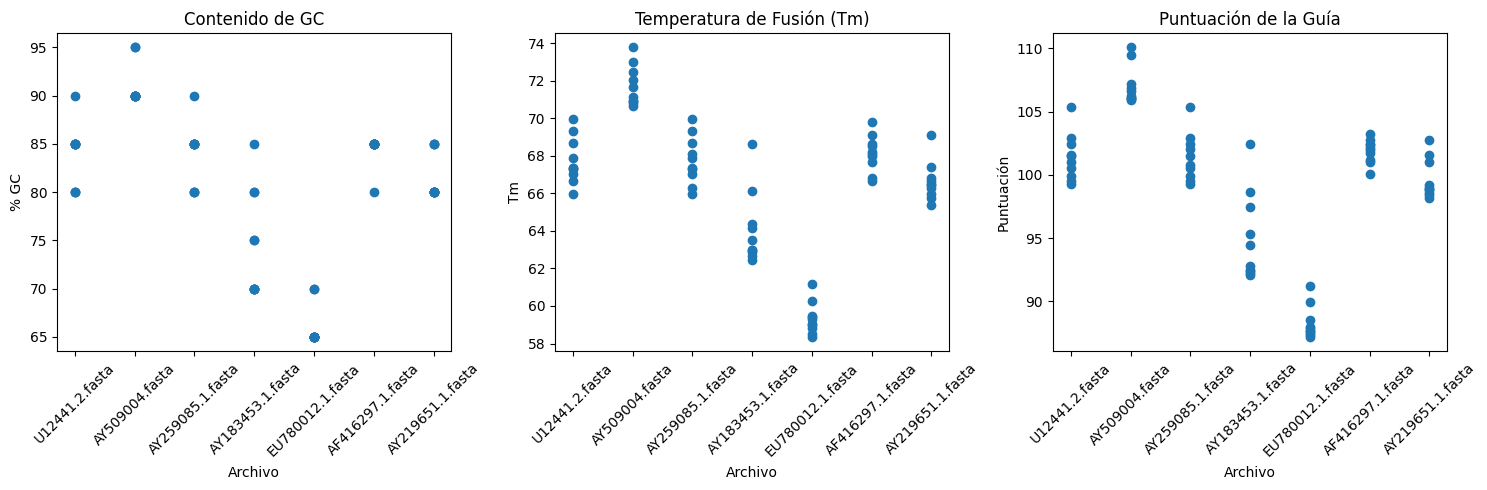

                   Guide       Score   GC%         Tm Specificity  \
0   CGCCGCTGCGGCCCTCGGCC  105.400507  90.0  69.984051        True   
1   TCGCCGCCGACGCCCGTGCC  102.916861  85.0  69.298886        True   
2   GGCAAGCGCCGCGACGGCCG  102.468448  85.0  68.663635        True   
3   CCCCGCCGGCGCTGTCACCG  101.540696  85.0  67.349319        True   
4   CGCCCGCCTGGGACGTCGCG  101.519146  85.0  67.318791        True   
..                   ...         ...   ...        ...         ...   
71  GCGCGTTGAGCGCCTGCCGG   98.885537  80.0  66.421177        True   
72  TCCACCCGCCCGGCCTTGCC   98.782355  80.0  66.275002        True   
73  ACGGTCGGCCGCTCCTGGCC   98.564505  80.0  65.966383        True   
74  GCCCAGCTCTCGCCCGCCCT   98.415526  80.0  65.755328        True   
75  GGCCAAGGCGTCCAGCGGGC   98.142235  80.0  65.368166        True   

                File  
0     U12441.2.fasta  
1     U12441.2.fasta  
2     U12441.2.fasta  
3     U12441.2.fasta  
4     U12441.2.fasta  
..               ...  
71  AY2196

In [21]:
#@title menu principal

import ipywidgets as widgets
from IPython.display import display, clear_output
from ipywidgets import Layout, Button

# Estilo personalizado para los botones con colores más suaves
estilo_botones = Layout(width='200px', height='40px', border='solid 1px lightgray',
                        color='black',  # Color de texto
                        background_color='#a4c2f4',  # Color de fondo más claro
                        font_weight='bold', border_radius='5px')

area_visualizacion = widgets.Output()

# Funciones para las acciones de Herramientas Adicionales
def clonar_actualizar_repositorio(b):
    print("Clonando o actualizando repositorio...")

def instalar_herramientas_visualizacion(b):
    print("Instalando herramientas de visualización...")

# Función para mostrar el menú principal
def mostrar_menu_principal(b=None):
    clear_output()
    display(boton_bdshewanella, boton_amshewanella, boton_guiasshewanella, boton_herramientas, boton_salir)

# Funciones para mostrar submenús
def mostrar_submenu_bdshewanella(b):
    clear_output()
    display(widgets.Label(value="Submenú BDShewanella"))
    display(boton_ejecutar_main_bdshewanella, boton_mostrar_datos_bdshewanella, boton_volver, area_visualizacion)

def mostrar_submenu_amshewanella(b):
    clear_output()
    display(widgets.Label(value="Submenú AMShewanella"), layout=estilo_botones)
    display(boton_ejecutar_main_amshewanella,boton_alinear_secuencias_amshewanella, boton_construir_arbol_filogenetico,boton_visualizar_conservacion, boton_visualizar_entropia, boton_visualizar_mapa_calor, boton_visualizar_barras_conservacion, boton_crear_logo_logomaker, boton_crear_logo_weblogo, boton_volver, area_visualizacion)

def mostrar_submenu_herramientas(b):
    clear_output()
    display(widgets.Label(value="Herramientas Adicionales"), layout=estilo_botones)
    display(boton_clonar_actualizar_repositorio, boton_instalar_herramientas_visualizacion, boton_volver, area_visualizacion)

def mostrar_submenu_guiasshewanella(b):
    clear_output()
    display(widgets.Label(value="Submenú GuiasShewanella"))
    display(boton_ejecutar_main_guiasshewanella, boton_buscar_guiasshewanella, boton_volver, area_visualizacion)

# Crear botones para las acciones de BDShewanella
boton_ejecutar_main_guiasshewanella = widgets.Button(description='Ejecutar Main', layout=estilo_botones)
boton_buscar_guiasshewanella = widgets.Button(description='Buscar Guias Cas9', layout=estilo_botones)

# Asignar funciones a los botones BDShewanella
boton_buscar_guiasshewanella.on_click(buscar_guias_guiasshewanella)
boton_ejecutar_main_guiasshewanella.on_click(ejecutar_main_bdshewanella)

# Crear botones para las acciones de BDShewanella
boton_ejecutar_main_bdshewanella = widgets.Button(description='Ejecutar Main', layout=estilo_botones)
boton_mostrar_datos_bdshewanella = widgets.Button(description='Mostrar Datos', layout=estilo_botones)

# Asignar funciones a los botones BDShewanella
boton_mostrar_datos_bdshewanella.on_click(mostrar_datos_bdshewanella)
boton_ejecutar_main_bdshewanella.on_click(ejecutar_main_guiasshewanella)

# Crear botones para las acciones de AMShewanella
boton_ejecutar_main_amshewanella = widgets.Button(description='Ejecutar Main', layout=estilo_botones)
boton_alinear_secuencias_amshewanella = widgets.Button(description='Alinear Secuencias', layout=estilo_botones)
boton_construir_arbol_filogenetico = widgets.Button(description='Construir Árbol Filogenético', layout=estilo_botones)
boton_visualizar_conservacion = widgets.Button(description="Visualizar Conservación", layout=estilo_botones)
boton_visualizar_entropia = widgets.Button(description="Visualizar Entropía", layout=estilo_botones)
boton_visualizar_mapa_calor = widgets.Button(description="Mapa de Calor Conservación", layout=estilo_botones)
boton_visualizar_barras_conservacion = widgets.Button(description="Barras de Conservación", layout=estilo_botones)
boton_crear_logo_logomaker = widgets.Button(description="Crear Logo Logomaker", layout=estilo_botones)
boton_crear_logo_weblogo = widgets.Button(description="Crear Logo WebLogo", layout=estilo_botones)

# Asignar funciones a los botones AMShewanella
boton_alinear_secuencias_amshewanella.on_click(alinear_secuencias_amshewanella)
boton_ejecutar_main_amshewanella.on_click(ejecutar_main_amshewanella)
boton_construir_arbol_filogenetico.on_click(construir_arbol_filogenetico)
boton_visualizar_conservacion.on_click(visualizar_conservacion)
boton_visualizar_entropia.on_click(visualizar_entropia)
boton_visualizar_mapa_calor.on_click(visualizar_mapa_calor_conservacion)
boton_visualizar_barras_conservacion.on_click(visualizar_barras_conservacion)
boton_crear_logo_logomaker.on_click(crear_logo_secuencias_logomaker)
boton_crear_logo_weblogo.on_click(crear_logo_secuencias_weblogo)


# Crear botones para las acciones de Herramientas Adicionales
boton_clonar_actualizar_repositorio = widgets.Button(description='Clonar o Actualizar Repositorio', layout=estilo_botones)
boton_instalar_herramientas_visualizacion = widgets.Button(description='Instalar Herramientas de Visualización', layout=estilo_botones)

boton_clonar_actualizar_repositorio.on_click(clonar_actualizar_repositorio)
boton_instalar_herramientas_visualizacion.on_click(instalar_herramientas_visualizacion)

# Botón para volver al menú principal
boton_volver = widgets.Button(description="Volver al Menú Principal", layout=estilo_botones)
boton_volver.on_click(mostrar_menu_principal)

# Botones del menú principal
boton_bdshewanella = widgets.Button(description="Módulo BDShewanella", layout=estilo_botones)
boton_bdshewanella.on_click(mostrar_submenu_bdshewanella)

boton_amshewanella = widgets.Button(description="Módulo AMShewanella", layout=estilo_botones)
boton_amshewanella.on_click(mostrar_submenu_amshewanella)

boton_guiasshewanella = widgets.Button(description="Módulo GuiasShewanella", layout=estilo_botones)
boton_guiasshewanella.on_click(mostrar_submenu_guiasshewanella)

boton_herramientas = widgets.Button(description="Herramientas Adicionales",layout=estilo_botones)
boton_herramientas.on_click(mostrar_submenu_herramientas)

boton_salir = widgets.Button(description="Salir",layout=estilo_botones)

# Mostrar menú principal
mostrar_menu_principal()
